#### 공공데이터 분석
- 분석하려는 것 : 2018.4-9 ~ 2023.4-9의 농업용 전기 사용량과 판매단가에 따른 전기 요금평균?
- 엑셀기준 4~11 열의 데이터만 추출해서 사용
- 여차하면 본 데이터에서 날리자 ^^

In [1]:
# 필요한 모듈과 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [2]:
# 데이터 불러오기
def read_data(file_path):
    idx_list = [x for x in range(0, 6, 1)]
    data_df = pd.read_excel(file_path, skiprows=[0, 1, 2])
    data_df = data_df.iloc[idx_list, :]
    data_df = data_df.drop(columns=['시구', '시군구', '계약구분'])

    # trans_col = ['고객호수(호)', '사용량(kWh)', '전기요금(원)', '평균판매단가(원/kWh)']
    # for col in trans_col:
    #     data_df[col] = data_df[col].str.strip()
    #     data_df[col] = data_df[col].str.replace(',', '')
    #     if col == '평균판매단가(원/kWh)':
    #         data_df[col] = data_df[col].astype('float')
    #     else:
    #         data_df[col] = data_df[col].astype('int')

    # data_df.info()
    data_df = data_df.set_index('년월').T
    return data_df

In [3]:
m_2018_df = read_data('./data/month_2018.xlsx')
m_2019_df = read_data('./data/month_2019.xlsx')
m_2020_df = read_data('./data/month_2020.xlsx')
m_2021_df = read_data('./data/month_2021.xlsx')
m_2022_df = read_data('./data/month_2022.xlsx')
m_2023_df = read_data('./data/month_2023.xlsx')

In [4]:
m_2023_df

년월,202304,202305,202306,202307,202308,202309
고객호수(호),697508,1940068,1944171,1947574,1952404,1956171
사용량(kWh),520869479,1263867071,1351487286,1355733975,1730530588,1677436585
전기요금(원),39615068873,96941425957,104957182879,108713568986,134600415797,129979875546
평균판매단가(원/kWh),76.1,76.7,77.7,80.2,77.8,77.5


In [5]:
int(m_2023_df.loc['전기요금(원)', '202304'])     # 숫자가 너무 큰지.. e로 나오는데 뽑으면 또 잘 나옴.

39615068873

In [22]:
from matplotlib.ticker import ScalarFormatter

In [94]:
def draw_graph(data_df, year, color):
    # 그래프 그리기
    label_list = m_2018_df.index.to_list()
    xticks_list = m_2018_df.columns.to_list()

    # 그래프가 너무 안보이니까 subplot을 그리자
    fig = plt.figure(figsize=(20, 9))
    axes = fig.subplots(2, 2, sharex=True)

    for row in range(2):
        for col in range(2):
            idx = row * 2 + col
            for i in range(6):
                axes[row, col].plot(xticks_list, data_df.loc[label_list[idx], :], color=color, marker='o', linestyle='-')
                
                # axes[row, col].set_xlabel('2018')
                axes[row, col].set_ylabel(label_list[idx])
                # axes[row, col].set_ylim(m_2018_df.loc[label_list[idx]].min(), m_2018_df.loc[label_list[idx]].max())
                axes[row, col].set_xticks(np.arange(0, 6, 1), ['4월', '5월', '6월', '7월', '8월', '9월'])
                axes[row, col].set_title(f"농업, 임업 및 어업별 {label_list[idx]}", fontsize=14)
                # axes[row, col].legend()
                
                # y축의 범위를 e가 안나오게
                axes[row, col].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
                axes[row, col].ticklabel_format(style='plain', axis='y')
                
                # 값을 표시
                for j, value in enumerate(data_df.loc[label_list[idx], :]):
                    axes[row, col].text(j, value, f'{value:,}', ha='center', va='top')
            
            if idx == 3:
                print('---------------------------------------------------------------')        
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 최댓값: {data_df.loc[label_list[idx],:].max():8,}")
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 최솟값: {data_df.loc[label_list[idx],:].min():8,}")
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 평균  : {round(data_df.loc[label_list[idx],:].mean(), 1):8,}")
                print()
            
            else:
                print('-----------------------------------------------------------------')        
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 최댓값: {data_df.loc[label_list[idx],:].max():18,}")
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 최솟값: {data_df.loc[label_list[idx],:].min():18,}")
                print(f"{year}년 농업, 임업 및 어업별 {label_list[idx]} 평균  : {round(data_df.loc[label_list[idx],:].mean(), 1):18,}")
                print()
                    
    title = f'{year}년 농업, 임업 및 어업별 전력 사용량'         
    fig.suptitle(title, fontsize=20)
    plt.savefig('./image/' + title + '.png', dpi=100)
    plt.show()
    plt.close()

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,710,065
2018년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,641,151
2018년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,665,353.0

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,665,132,092
2018년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,081,235,286
2018년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,292,258,125.5

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 전기요금(원) 최댓값:     77,415,301,163
2018년 농업, 임업 및 어업별 전기요금(원) 최솟값:     54,061,673,817
2018년 농업, 임업 및 어업별 전기요금(원) 평균  :   62,843,971,832.7

---------------------------------------------------------------
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:       50
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     46.5
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     48.8



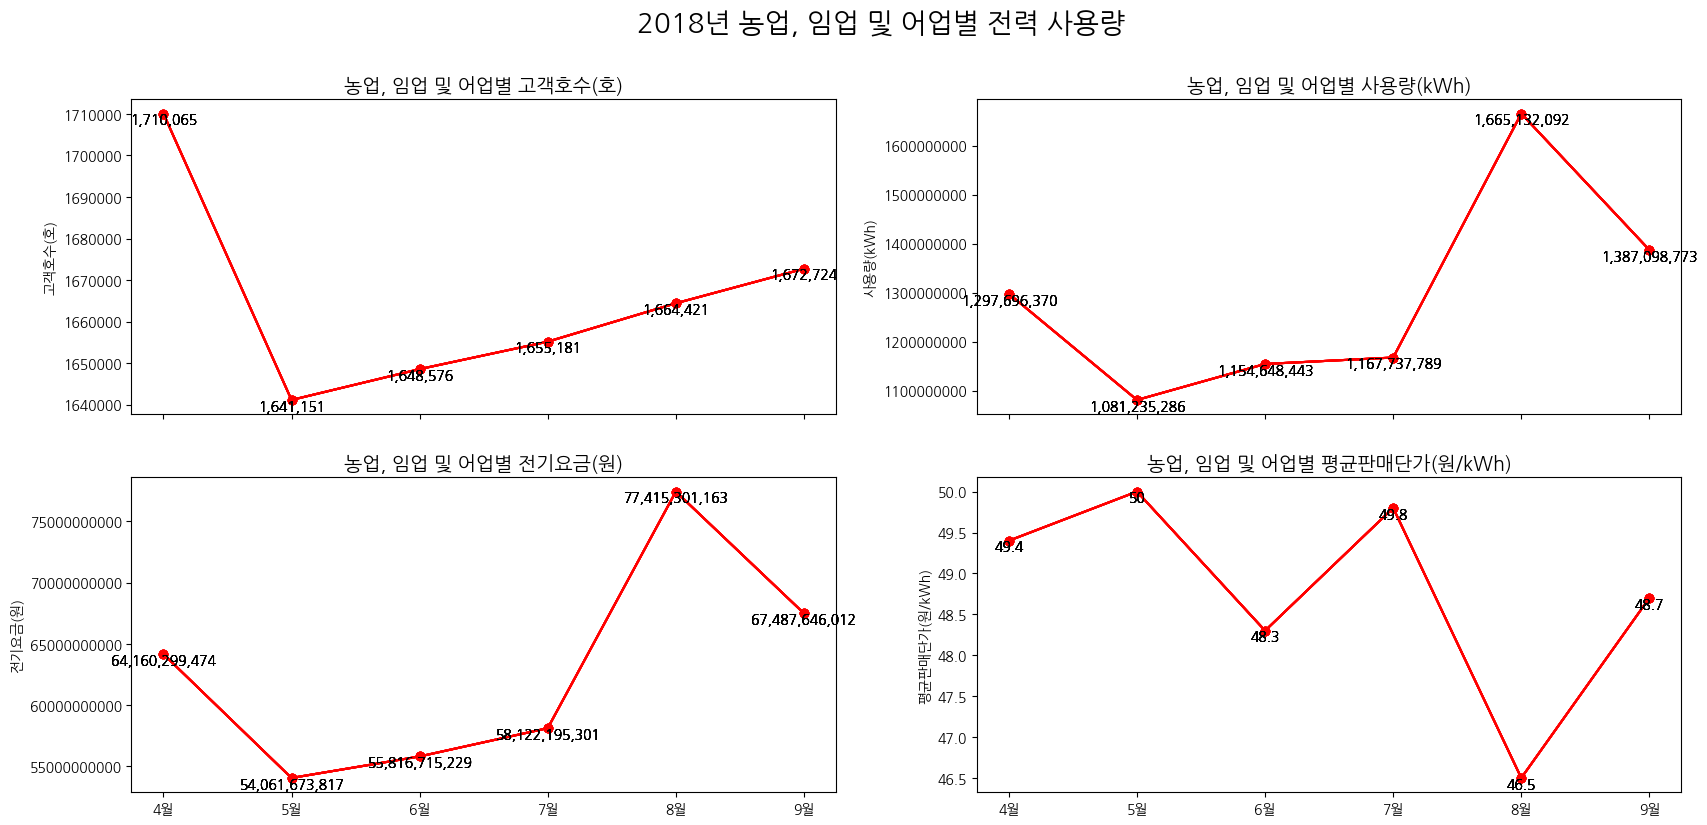

In [95]:
draw_graph(m_2018_df, 2018, 'red')

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,710,065
2018년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,641,151
2018년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,665,353.0

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,665,132,092
2018년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,081,235,286
2018년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,292,258,125.5

-----------------------------------------------------------------
2018년 농업, 임업 및 어업별 전기요금(원) 최댓값:     77,415,301,163
2018년 농업, 임업 및 어업별 전기요금(원) 최솟값:     54,061,673,817
2018년 농업, 임업 및 어업별 전기요금(원) 평균  :   62,843,971,832.7

---------------------------------------------------------------
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:       50
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     46.5
2018년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     48.8



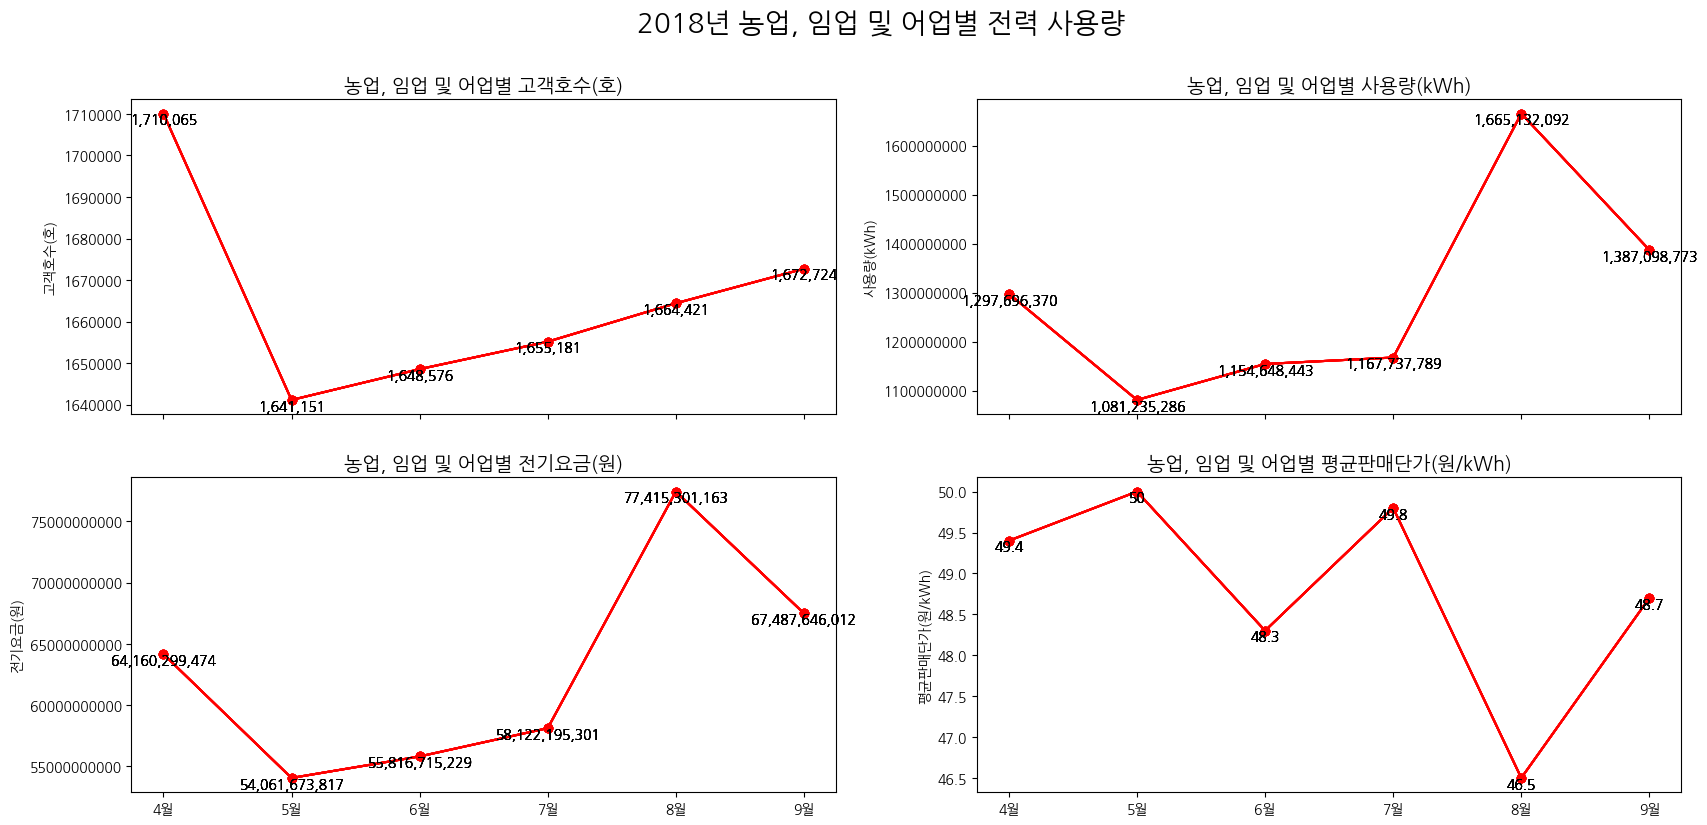

-----------------------------------------------------------------
2019년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,776,865
2019년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,703,446
2019년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,729,147.7

-----------------------------------------------------------------
2019년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,523,920,115
2019년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,186,816,117
2019년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,336,899,851.5

-----------------------------------------------------------------
2019년 농업, 임업 및 어업별 전기요금(원) 최댓값:     73,791,384,722
2019년 농업, 임업 및 어업별 전기요금(원) 최솟값:     58,861,355,008
2019년 농업, 임업 및 어업별 전기요금(원) 평균  :   65,368,533,533.7

---------------------------------------------------------------
2019년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:     49.6
2019년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     48.3
2019년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     48.9



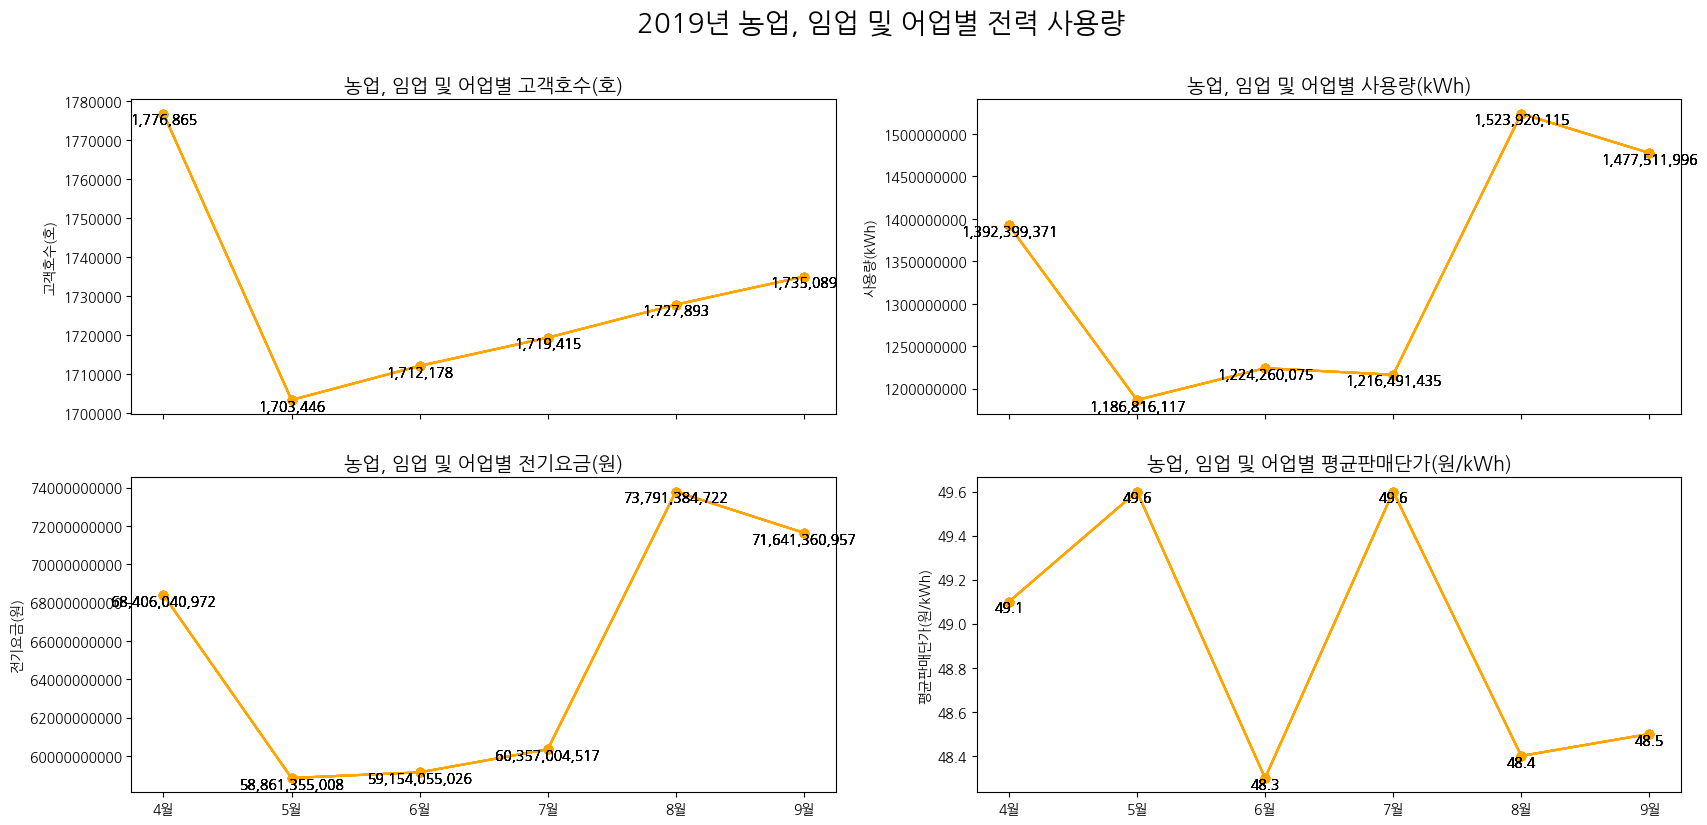

-----------------------------------------------------------------
2020년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,826,648
2020년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,762,685
2020년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,786,907.8

-----------------------------------------------------------------
2020년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,533,353,944
2020년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,198,614,502
2020년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,331,516,844.5

-----------------------------------------------------------------
2020년 농업, 임업 및 어업별 전기요금(원) 최댓값:     74,820,994,328
2020년 농업, 임업 및 어업별 전기요금(원) 최솟값:     60,498,536,596
2020년 농업, 임업 및 어업별 전기요금(원) 평균  :   65,994,423,034.8

---------------------------------------------------------------
2020년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:     50.9
2020년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     48.7
2020년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     49.6



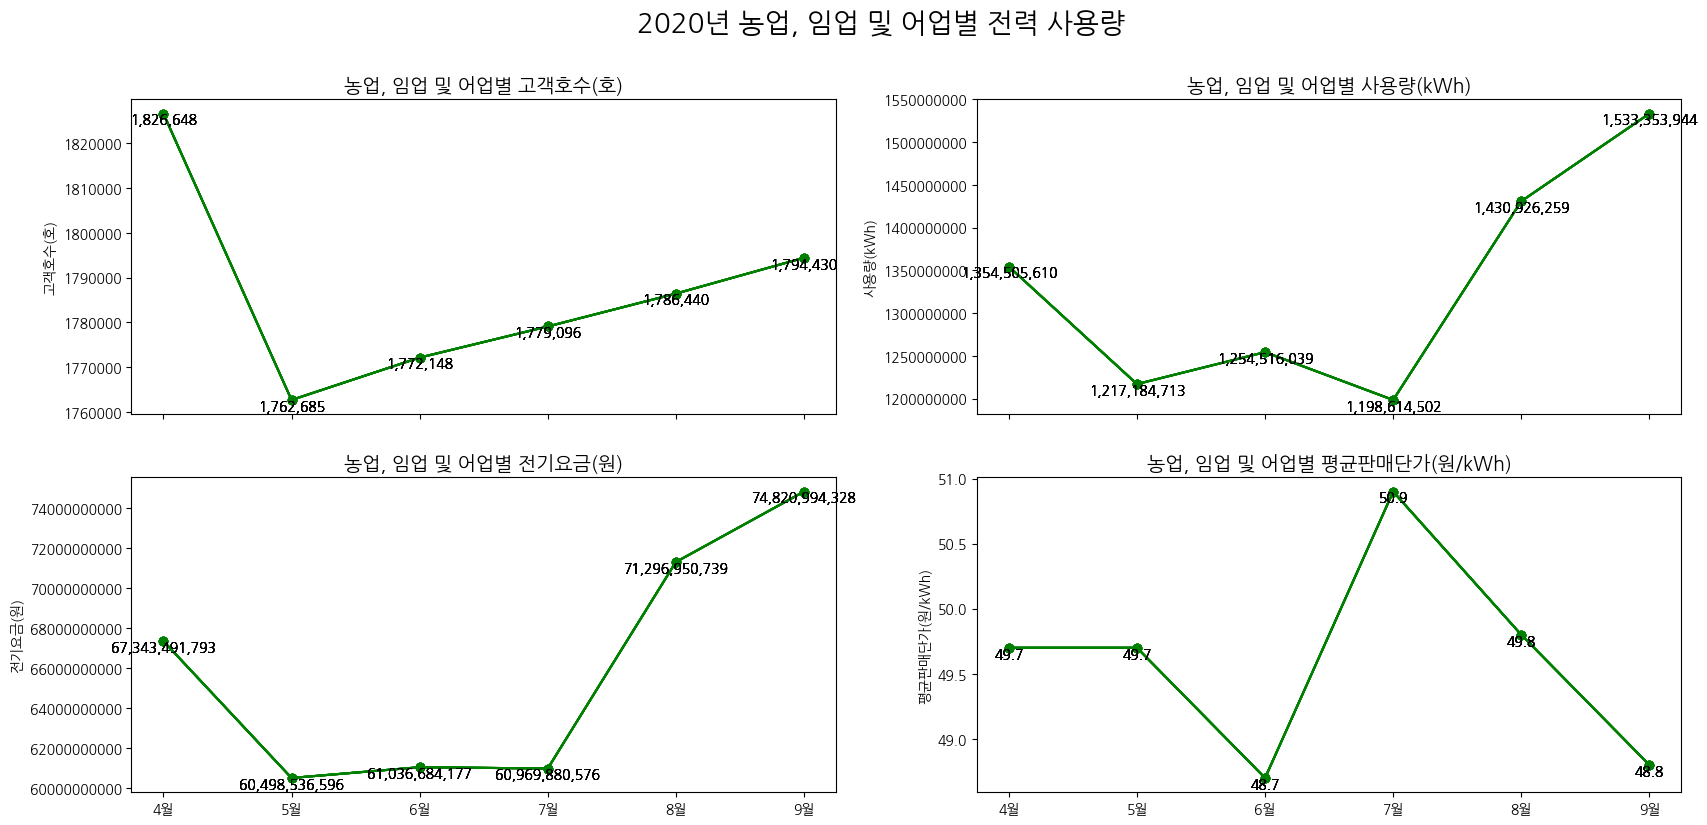

-----------------------------------------------------------------
2021년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,892,715
2021년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,828,566
2021년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,852,761.0

-----------------------------------------------------------------
2021년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,783,758,266
2021년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,227,397,892
2021년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,437,679,021.0

-----------------------------------------------------------------
2021년 농업, 임업 및 어업별 전기요금(원) 최댓값:     79,904,977,341
2021년 농업, 임업 및 어업별 전기요금(원) 최솟값:     58,301,170,012
2021년 농업, 임업 및 어업별 전기요금(원) 평균  :   66,721,180,096.0

---------------------------------------------------------------
2021년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:     47.6
2021년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     44.8
2021년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     46.6



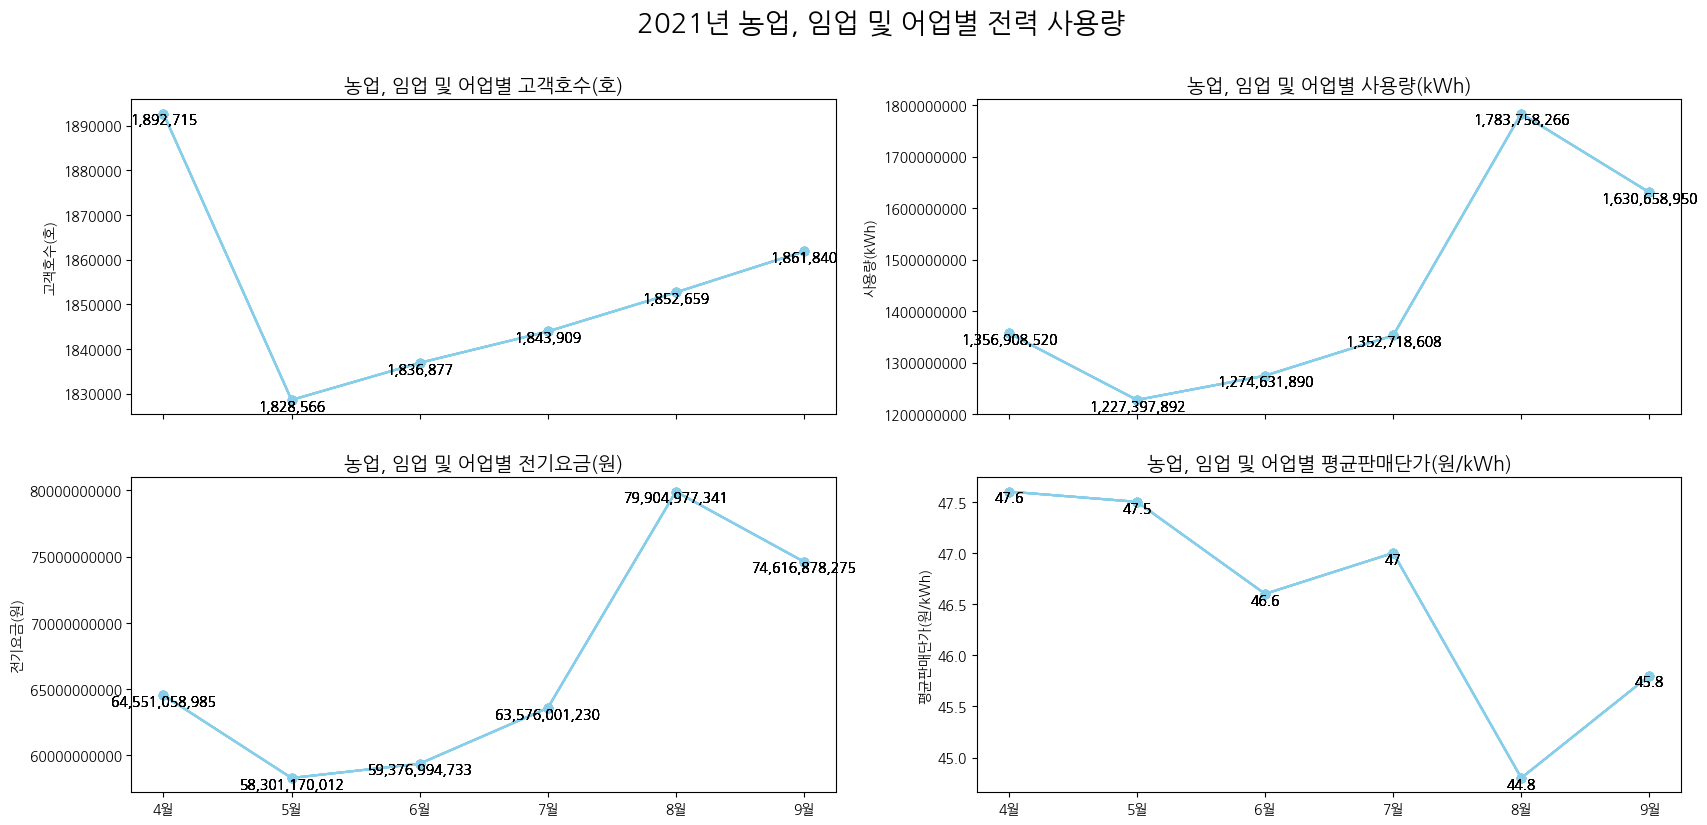

-----------------------------------------------------------------
2022년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,964,757
2022년 농업, 임업 및 어업별 고객호수(호) 최솟값:          1,892,558
2022년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,917,614.7

-----------------------------------------------------------------
2022년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,712,491,538
2022년 농업, 임업 및 어업별 사용량(kWh) 최솟값:      1,313,156,649
2022년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,495,460,541.0

-----------------------------------------------------------------
2022년 농업, 임업 및 어업별 전기요금(원) 최댓값:    104,728,739,545
2022년 농업, 임업 및 어업별 전기요금(원) 최솟값:     74,658,527,732
2022년 농업, 임업 및 어업별 전기요금(원) 평균  :   87,482,224,941.3

---------------------------------------------------------------
2022년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:       62
2022년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     53.2
2022년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     58.4



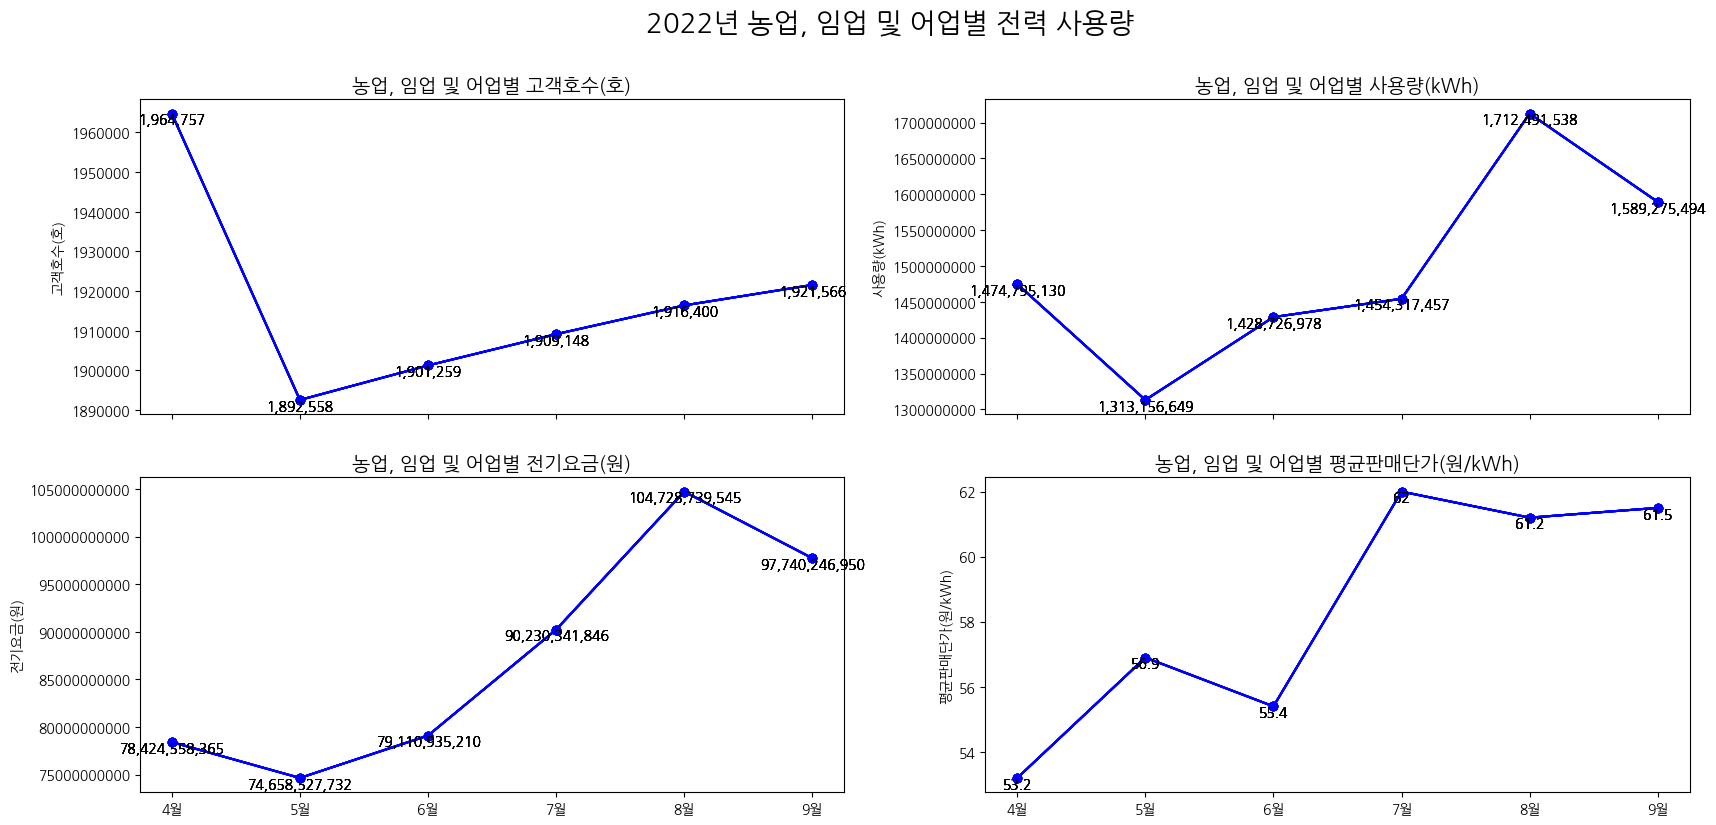

-----------------------------------------------------------------
2023년 농업, 임업 및 어업별 고객호수(호) 최댓값:          1,956,171
2023년 농업, 임업 및 어업별 고객호수(호) 최솟값:            697,508
2023년 농업, 임업 및 어업별 고객호수(호) 평균  :        1,739,649.3

-----------------------------------------------------------------
2023년 농업, 임업 및 어업별 사용량(kWh) 최댓값:      1,730,530,588
2023년 농업, 임업 및 어업별 사용량(kWh) 최솟값:        520,869,479
2023년 농업, 임업 및 어업별 사용량(kWh) 평균  :    1,316,654,164.0

-----------------------------------------------------------------
2023년 농업, 임업 및 어업별 전기요금(원) 최댓값:    134,600,415,797
2023년 농업, 임업 및 어업별 전기요금(원) 최솟값:     39,615,068,873
2023년 농업, 임업 및 어업별 전기요금(원) 평균  :  102,467,923,006.3

---------------------------------------------------------------
2023년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최댓값:     80.2
2023년 농업, 임업 및 어업별 평균판매단가(원/kWh) 최솟값:     76.1
2023년 농업, 임업 및 어업별 평균판매단가(원/kWh) 평균  :     77.7



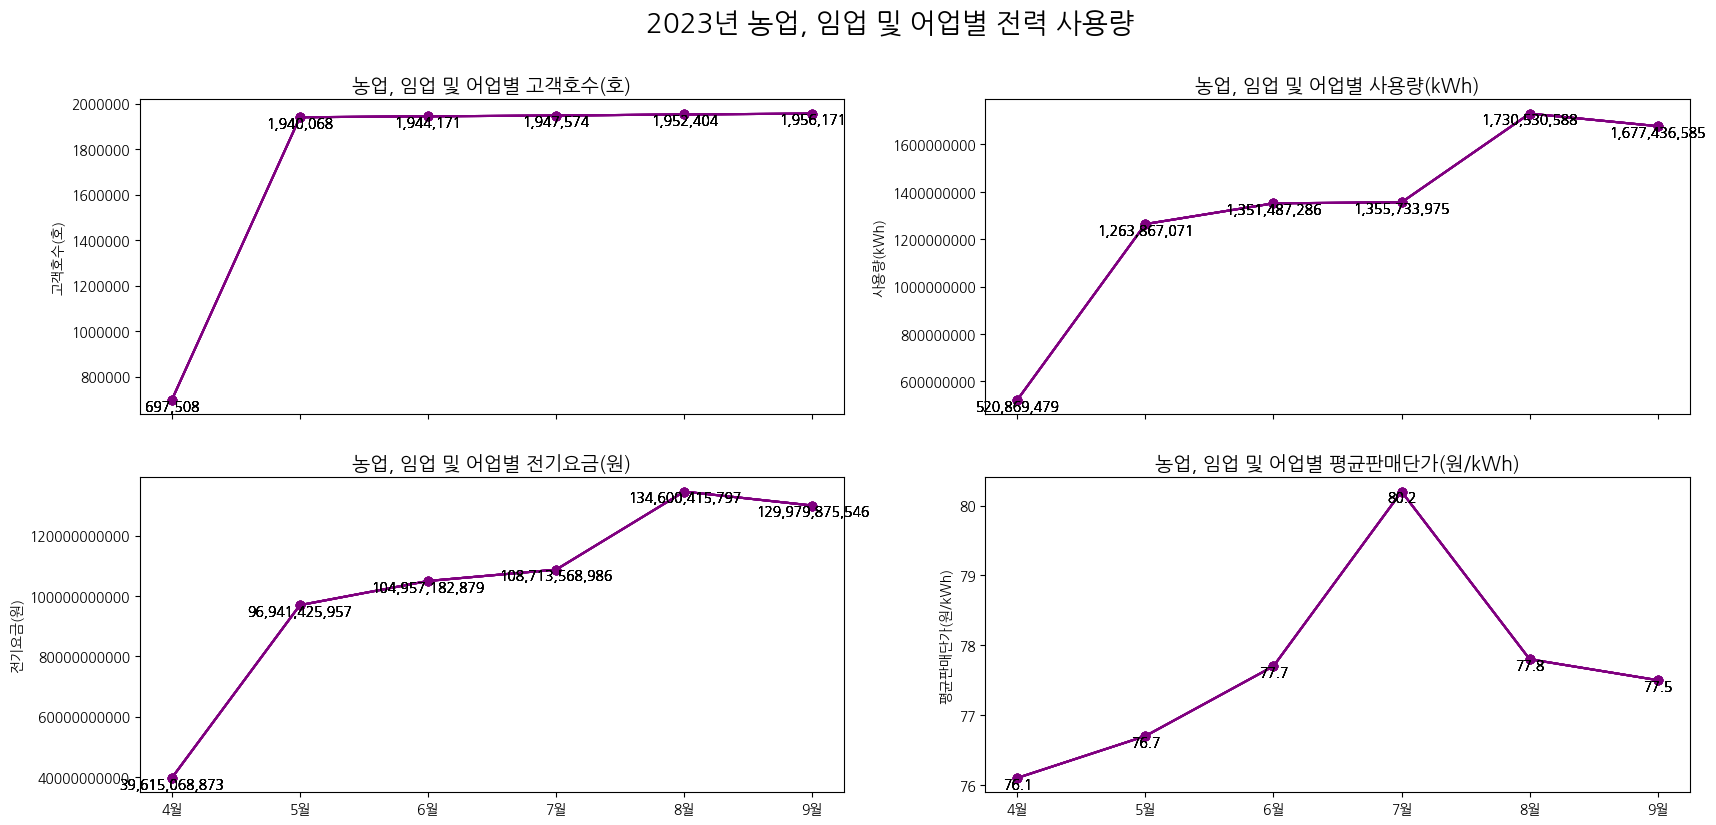

In [96]:
data_list = [m_2018_df, m_2019_df, m_2020_df, m_2021_df, m_2022_df, m_2023_df]
year_list = [2018, 2019, 2020, 2021, 2022, 2023]
color_list = ['red', 'orange', 'green', 'skyblue', 'blue', 'purple']

for i in range(len(data_list)):
    draw_graph(data_list[i], year_list[i], color_list[i])